# TP2 : Reconstruction tomographique
### Physique Numérique (PHY-3500)
### Par: Simon Gauthier, Laurent Émond, Thomas Charland
### Présenté à: Xavier Roy-Pomerleau
### Remis le: 23 mars 2025

## Mise en contexte

L'arrivée de l'ordinateur a révolutionné la médecine moderne en permettant d'utiliser des méthodes d'imagerie nécessitant sur une puissance de calcul élevée. La tomodensitométrie (TDM), qui permet d'estimer la distribution de la densité d'un objet à partir de plusieurs mesures d'atténuation [1], est l'une de ces méthodes. La tomodensitométrie est majoritairement utilisée pour l'analyse de zones non-visibles par d'autres examens d'imagerie médicale [2], et permet d'obtenir des résultat de l'ordre du millimètre [1]

Ce notebook résout le TP2 du cours de Physique Numérique (PHY-3500). 

In [16]:
#Importer toutes les libraries nécessaires pour la résolution du TP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import recon as recon
from PIL import Image
import math

# Numéro 1

En utilisant la base de donnée XCOM du NIST [3], nous obtenons un coefficient d'atténuation $\mu = 2.059 \cdot 10^{-1}$ cm^2/g pour un photon de 60KeV voyageant dans l'eau à 1.0 g/cm^3. 

In [9]:
#Code pour résoudre le numéro 1
def remaining_intensity(attenuation_coefs_of_media : list, distance_travelled_in_media : list):
    sum_value = 0
    for i in range(len(attenuation_coefs_of_media)):
        sum_value += attenuation_coefs_of_media[i] * distance_travelled_in_media[i]
    
    remaining_intensity = 100 * math.e**(-sum_value)
    return remaining_intensity / 100

print(f"La fraction du signal subsistant après 5cm est: {remaining_intensity([0.2059], [5]):.5f}")
print(f"La fraction du signal subsistant après 20cm est: {remaining_intensity([0.2059], [20]):.5f}")

La fraction du signal subsistant après 5cm est: 0.35719
La fraction du signal subsistant après 20cm est: 0.01628


Après avoir traversé 5cm d'eau, la fraction du signal subsistante est de 35.72%. Après avoir traversé 20cm d'eau, la fraction du signal subsistante est de 1.62%. 

# Numéro 2

Une manière simple (et un peu naïve) de reconstruire une image à partir d'un sinogramme tomodensitométrique est d'identifier les rayons qui passent par chaque voxel et de les sommer afin d'obtenir la valeur du pixel [1]. L'image ainsi obtenue est nommée laminogramme. En utilisant cette méthode, dite *voxel-driven*, nous obtenons les images suivantes pour les sinogrammes *sinogram-password.txt* et *sinogram-patient.txt*.

Laminogramme obtenu du sinogram-password:



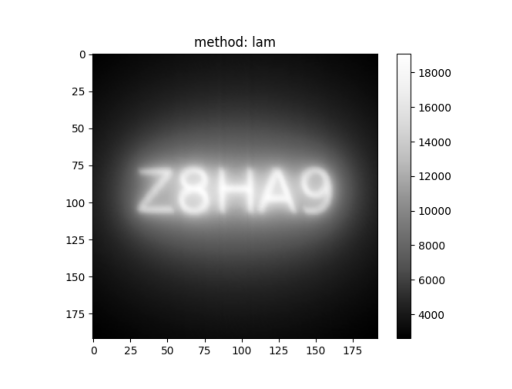

Laminogramme obtenue du sinogram-patient:



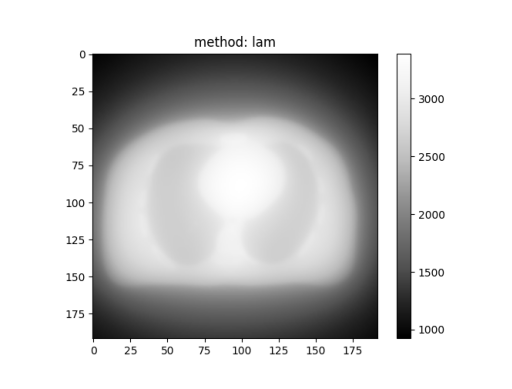

Image du fantôme numérique:



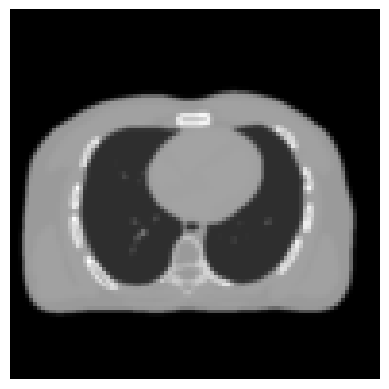

96 96


In [ ]:
#Code pour résoudre le numéro 2

print("Laminogramme obtenu du sinogram-password:\n")
image = mpimg.imread('mot_de_passe.png')
plt.imshow(image)
plt.axis('off')
plt.show()

print("Laminogramme obtenu du sinogram-patient:\n")
image = mpimg.imread('laminogramme.png')
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open('phantom-thorax-096-smooth.png')
widht, height = image.size
print("Image du fantôme numérique:\n")
image = mpimg.imread('phantom-thorax-096-smooth.png')
plt.imshow(image, cmap="gray")
plt.axis('off') 
plt.show()
image = Image.open('phantom-thorax-096-smooth.png')
width, height = image.size
print(width, height)


Deux différences majeures sont identifiables entre le sinogramme du patient et le fantôme numérique:

- le contraste est plus fort sur l'image du fantôme numérique que sur celle du laminogramme. Lors de la création du laminogramme, le fait d’étaler les projections sur la grille de l’image ajoute beaucoup de composantes de basse fréquence spatiale dans l’image [1]; nous nous retrouvons alors avec un contraste plus faible sur le laminogramme que sur le fantôme initiale. Cela fait en sorte que nous perdons plusieurs détails de l'image; dans ce cas-ci, nous perdons entièrement la position des os ainsi que les tâches dans les poumons, ce qui rend le laminogramme ainsi obtenu inutile d'un point de vue médical!
- l'image du fantôme numérique est plus pixelisée que celle du laminogramme. En effet, l'image du fantôme numérique a une dimension de 96x96, alors que le laminogramme obtenu est de 192x192. Ceci est simplement dû au fait que, lors de la reconstruction des voxels, nous avons utilisé une matrice 192x192 comme grille virtuelle de reconstruction; en vérité, nous ne gagnons pas d'information supplémentaire avec cette pixelisation augmentée.

Il faut certainement améliorer l'image obtenue si l'on veut pouvoir utiliser le laminogramme à des fins médicales! C'est ce que nous ferons au numéro suivant.

# Numéro 3

Sinogramme patient original:



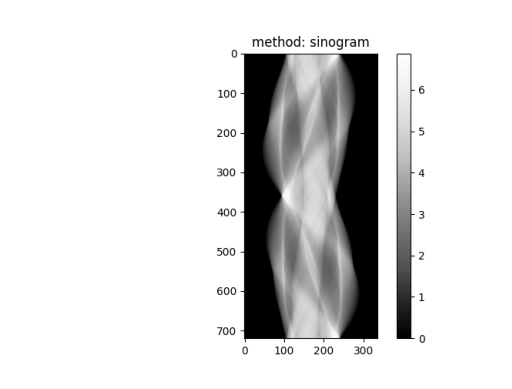

Sinogramme patient filtré passe-haut:



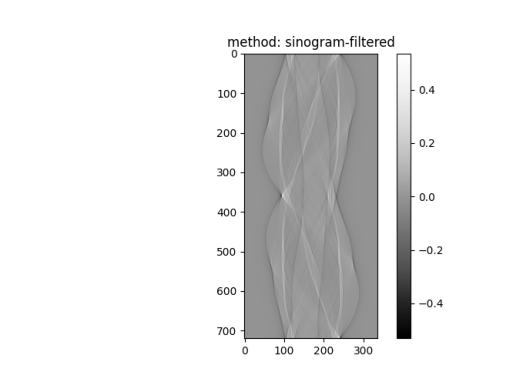

In [ ]:
#Code pour résoudre le numéro 3
print("Sinogramme patient original (fourni):\n")
image = mpimg.imread('sinogram-patient.png')
plt.imshow(image)
plt.axis('off')
plt.show()

print("Sinogramme patient filtré passe-haut:\n")
image = mpimg.imread('sinogram-patient-filtered.png')
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

Bien qu'il soit qualitativement évident que les deux sinnogrammes proviennent du même set de données, plusieurs différences sont observées:
- comme l'on s'y attend, seulement les haute fréquences sont conservées une fois le sinogramme filtré. Cela fait donc en sorte que nous voyons très facilement les zones de contraste (c'est sont d'ailleurs les zones qui, de manière générale, nous intéressent le plus d'un point de vue médicale), alors qu'elles sont moins évidents dans le graphique non-filtré. 
- de plus, l'on observe que l'intensité des pixels sur l'image est moindre pour le sinogramme filtré. Cela est également attendu puisqu'en filtrant les basses fréquence, nous éliminons les composantes "DC" qui rehaussent les valeurs des pixels de larges plages spatiales. 

# Numéro 4

Laminogramme obtenu du sinogram-patient filtré passe-haut:



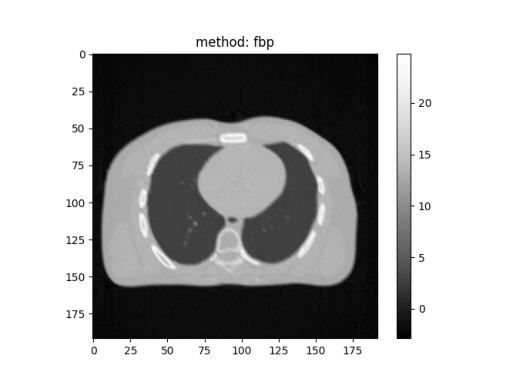

Fantôme numérique initial:



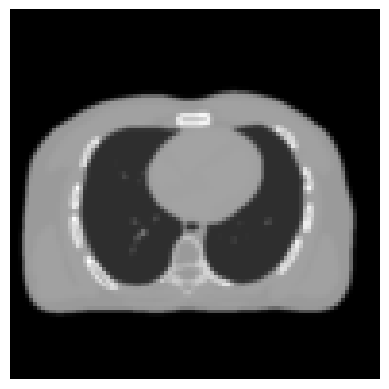

In [21]:
#Code pour résoudre le numéro 4
print("Laminogramme obtenu du sinogram-patient filtré passe-haut:\n")
image = mpimg.imread('backproject.png')
plt.imshow(image)
plt.axis('off')
plt.show()

print("Fantôme numérique initial:\n")
image = mpimg.imread('phantom-thorax-096-smooth.png')
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

Wow, cela fait toute une différence vs le sinogramme non-filtré! L'on remarque toutefois deux différences majeurs avec le fantôme initial:
- encore une fois, la résolution du laminogramme est supérieure à celle du fantôme numérique. Comme à la question 2, cela est dû au fait que nous représentons les voxels sur une grille 192x192, alors que le fantôme numérique est une image de taille 96x96. Il est important de préciser que, comme précédemment, nous ne gagnons pas d'informations supplémentaire avec cette résolution supérieure, bien qu'elle soit plus agréable à regarder!

# Numéro 5

In [7]:
#Code pour résoudre le numéro 5

# Bibliographie

[1] TP2 : Reconstruction tomographique, D. Matenine et P. Després, *PHY-3500– Physique num´erique (H25)*

[2] Pourquoi réaliser une tomodentometrie, Information hospitalière, <https://www.informationhospitaliere.com/tomodensitometrie-deroulement-precautions-et-effets-secondaires#Pourquoi_realiser_une_tomodensitometrie%E2%80%89>

[3] XCOM database, NIST, <https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html>

[4]